In [1]:
from pyteomics import mgf, fasta, mass
import matplotlib.pyplot as plt
import scipy.stats
import scipy.spatial.distance
import numpy
import sklearn.metrics.pairwise

In [2]:
%matplotlib inline

In [3]:
with mgf.read('data/spectra/amethyst_annotated.mgf') as reader:
    spectra = list(reader)

foo = spectra[0]
baz = spectra[1]

In [4]:
foo

{'charge array': masked_array(data = [-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
  -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --],
              mask = [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True],
        fill_value = 0),
 'intensity array': array([   6.,    5.,    5.,    7.,   16.,    5.,   10.,   17.,   10.,
           8.,   14.,    8.,   16.,   16.,   14.,    7.,    9.,   12.,
           6.,   12.,   11.,   10.,   18.,   11.,   17.,   14.,   20.,
           5.,   20.,    7.,    9.,    8.,    8.,    6.,   13.,  100.,
          11.,   10.,   14.,   32.,    5.,    7.,   11.,    4.,    4.,
           6.,    7.,   21.,   81.]),
 'm/z array': array([  227.11 ,   230.118,   244

<Container object of 49 artists>

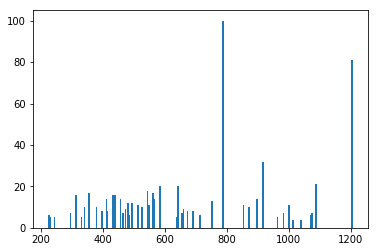

In [5]:
plt.bar(foo['m/z array'], foo['intensity array'], width=5)

In [6]:
foo['params']

{'charge': [1],
 'pepmass': (1212.97, None),
 'peptide': 'DGDKPEETQGK',
 'title': '3.spectrum'}

In [7]:
def b_ionts_gen(sequence):
    return (sequence[:i] for i in range(1, len(sequence) + 1))

list(b_ionts_gen(foo['params']['peptide']))

['D',
 'DG',
 'DGD',
 'DGDK',
 'DGDKP',
 'DGDKPE',
 'DGDKPEE',
 'DGDKPEET',
 'DGDKPEETQ',
 'DGDKPEETQG',
 'DGDKPEETQGK']

In [8]:
def calculate_spectrum(sequence):
    # TODO charge?
    # TODO only b-ionts or both b-ionts and y-ionts
    return [mass.calculate_mass(sequence=iont, ion_type='b', charge=1)
            for iont in b_ionts_gen(sequence)]

foo_spec = calculate_spectrum(foo['params']['peptide'])
baz_spec = calculate_spectrum(baz['params']['peptide'])
foo_spec

[116.0342194906,
 173.05568321117,
 288.082626235,
 416.177589249,
 513.2303530978501,
 642.27294618582,
 771.3155392737899,
 872.3632177422,
 1000.42179524748,
 1057.44325896805,
 1185.53822198205]

<Container object of 9 artists>

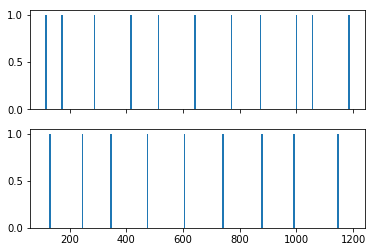

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
ax1.bar(foo_spec, 1, width=5)
ax2.bar(baz_spec, 1, width=5)

<Container object of 49 artists>

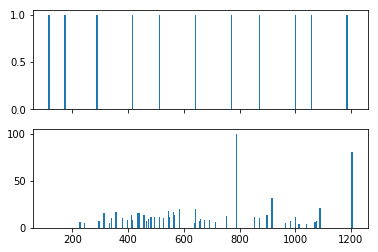

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)
ax1.bar(foo_spec, 1, width=5)
ax2.bar(foo['m/z array'], foo['intensity array'], width=5)

In [11]:
def bin_spectrum(m_z, intensity, bins=13000, range=(0, 1300)):
    binned, _, _ = scipy.stats.binned_statistic(m_z, intensity, statistic='sum',
                                                bins=bins, range=range)
    return binned

foo_exp = bin_spectrum(foo['m/z array'], foo['intensity array'])
foo_teo = bin_spectrum(foo_spec, [1] * len(foo_spec))
baz_teo = bin_spectrum(baz_spec, [1] * len(baz_spec))

In [12]:
sklearn.metrics.pairwise.cosine_similarity(foo_exp.reshape(1, -1), foo_teo.reshape(1, -1))

array([[ 0.11779774]])

In [13]:
sklearn.metrics.pairwise.cosine_similarity(foo_exp.reshape(1, -1), baz_teo.reshape(1, -1).reshape(1, -1))

array([[ 0.]])

In [14]:
with fasta.read('data/sequence_database/amop_msdb_10000.fasta') as db:
    for description, sequence in db:
        ...